In [1]:
from scipy.spatial import Voronoi, voronoi_plot_2d

from sklearn.manifold import TSNE

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams["figure.dpi"] = 150
import pandas as pd

from colour import Color

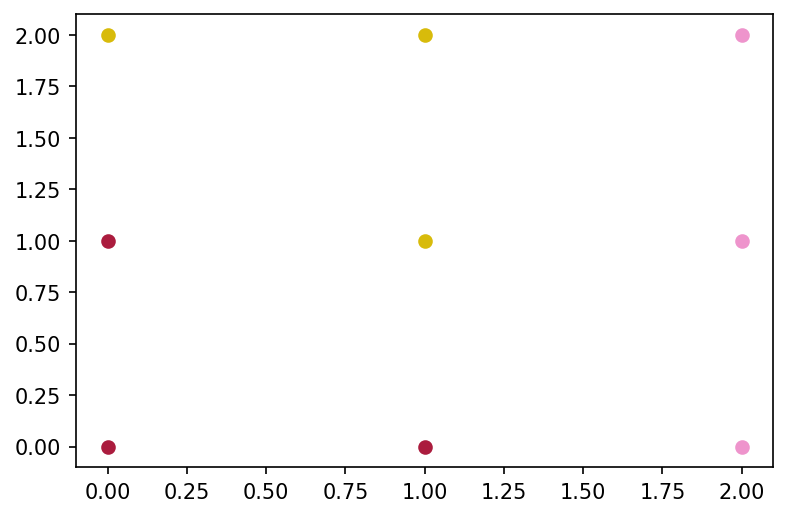

In [2]:
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])
communities = [1, 1, 2, 1, 2, 2, 3, 3, 3]

def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb

randomColors = [f"#{rgb_to_hex(tuple(np.random.choice(range(256), size=3).flatten()))}" for i in range(max(communities))]

for i in range(len(points)):  
    plt.scatter(points[i,0], points[i,1], color=randomColors[communities[i]-1])

plt.show()

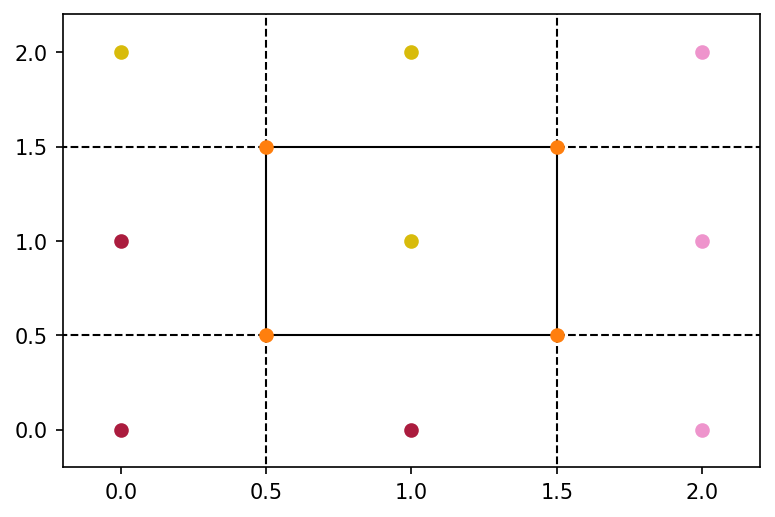

In [3]:
vor = Voronoi(points)
fig = voronoi_plot_2d(vor, point_size=0)

ax = fig.get_axes()[0]

for i in range(len(points)):
    ax.scatter(points[i,0], points[i,1], color=randomColors[communities[i]-1])

plt.show()

In [28]:
#print(dir(vor))
print(vor.ridge_dict)

# print(vor.ridge_points)
# print(vor.ridge_vertices)
# print(vor.point_region)

# # The indices in the regions arrays seem to be indices for vor.vertices (or -1 for infinite)
# print(vor.regions)
print(vor.points)
print(vor.vertices)

{(0, 3): [-1, 0], (0, 1): [-1, 0], (2, 5): [-1, 1], (2, 1): [-1, 1], (1, 4): [0, 1], (7, 8): [-1, 3], (7, 6): [-1, 2], (7, 4): [2, 3], (8, 5): [-1, 3], (6, 3): [-1, 2], (4, 5): [1, 3], (4, 3): [0, 2]}
[[0. 0.]
 [0. 1.]
 [0. 2.]
 [1. 0.]
 [1. 1.]
 [1. 2.]
 [2. 0.]
 [2. 1.]
 [2. 2.]]
[[0.5 0.5]
 [0.5 1.5]
 [1.5 0.5]
 [1.5 1.5]]


[[[0.5, 0.5], [0.5, 1.5]], [[1.5, 1.5], [0.5, 1.5]], [[0.5, 1.5], [0.5, 0.5]]]


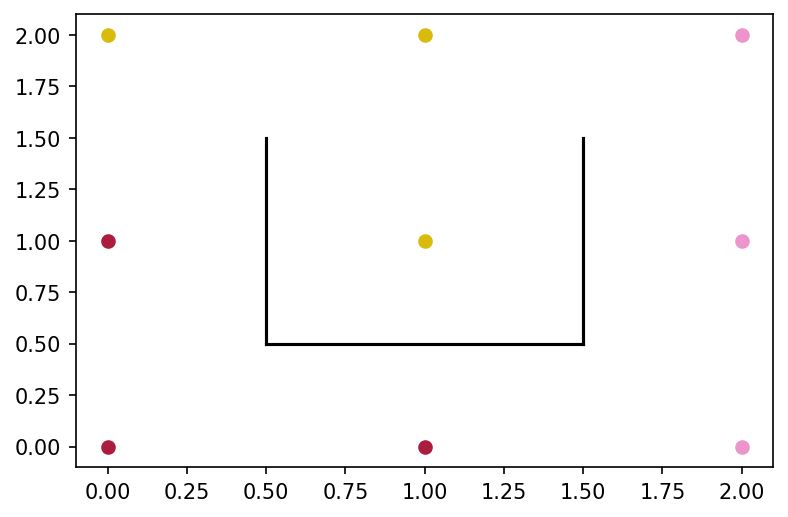

In [27]:
def cullVoronoi(vor: Voronoi):

    # We can't know how many lines will be good in advance, so we just
    # start with an empty array and append as we go
    goodLines = []
    
    # We iterate over all of the ridges (lines) in the voronoi tessellation
    for k, v in vor.ridge_dict.items():
        # The key will be a tuple with the indices of the two points this line divides
        # The value will be an array with the indices of the two vertices that define the line
        
        # If they are in the same community, we don't need to draw that line
        # Otherwise, we do
        if communities[k[0]] != communities[k[1]]:
            # We don't care about lines that extend to infinity, so ignore those
            if v[0] == -1 or v[1] == -1:
                pass
            else:
                v1 = vor.vertices[v[0]]
                v2 = vor.vertices[v[1]]
                goodLines.append([[v1[0], v2[0]], [v1[1], v2[1]]])

    return np.array(goodLines)

for i in range(len(goodLines)):
    plt.plot(goodLines[i,0], goodLines[i,1], c='black')

for i in range(len(points)):
    plt.scatter(points[i,0], points[i,1], color=randomColors[communities[i]-1])

plt.show()

In [51]:
goodLines = []
for i in range(len(vor.ridge_points)):
    if communities[vor.ridge_points[i,0]] != communities[vor.ridge_points[i,1]]:
        ridgeVertices = vor.regions[
            vor.point_region[i]]
        if ridgeVertices[0] == -1:
            lineStart = [0, 0]
        else:
            lineStart = vor.vertices[ridgeVertices[0]]
        if ridgeVertices[1] == -1:
            lineEnd = [0, 0]
        else:
            lineEnd = vor.vertices[ridgeVertices[1]]
            
        goodLines.append([lineStart, lineEnd])

IndexError: index 9 is out of bounds for axis 0 with size 9

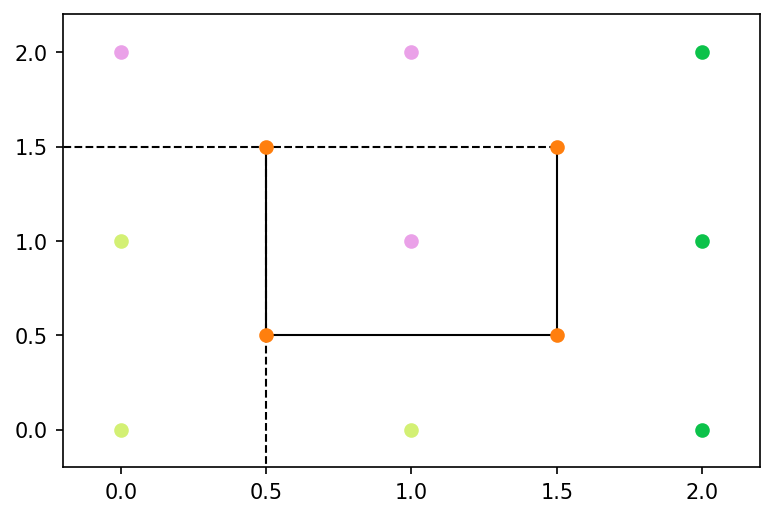

In [38]:
fig = voronoi_plot_2d(vor, point_size=0)

ax = fig.get_axes()[0]

for i in range(len(points)):
    ax.scatter(points[i,0], points[i,1], color=randomColors[communities[i]-1])

plt.show()